# Figure 8: Obsering Performance Degradation as the Index-Size Grows

Query performance against the index populated with 1.6 billion entries using the m3.quad instance type.
We include our measurements and the code to generate the figures.

### Prerequisites

To recreate the figure only the dependencies along with the datasets in "../data/figure5" are required.

Ensure the following imports work:

In [1]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import humanize
from matplotlib import rcParams
import matplotlib.pylab as plt

Specify data path (default is measurements series used in the paper):

In [19]:
DATA_DIR = "../data/figure8/2022-08-31T20:44:59.527076_m3.quad_heavily-curious-roughy"

## Loading and Preparing the Data

In [20]:
df_queries = pd.read_csv(f"{DATA_DIR}/query_measurements.csv")
df_queries.head()

,Unnamed: 0,iteration,index_size,query,query_name,elapsed_seconds,num_result_rows
0,0,0,1628179195,SELECT COUNT(*) FROM nsdf.catalog,count,0.001982,1
1,1,0,1628179195,SELECT SUM(size) FROM nsdf.catalog,sum,7.244621,1
2,2,0,1628179195,"SELECT catalog, COUNT(*), SUM(size) FROM nsdf....",group_by_catalog,14.463061,50
3,3,0,1628179195,"SELECT bucket, any(catalog), COUNT(*), SUM(siz...",group_by_bucket,23.651277,1143632
4,4,0,1628179195,SELECT * FROM nsdf.catalog LIMIT 10,search_first_page,0.158949,10


## Generating the Figure

[Text(0, 0, 'SELECT COUNT(*) FROM nsdf.catalog'),
 Text(0, 1, 'SELECT SUM(size) FROM nsdf.catalog'),
 Text(0, 2, 'SELECT repository, COUNT(*), SUM(size) FROM nsdf.catalog GROUP BY repository'),
 Text(0, 3, 'SELECT collection, any(repository), COUNT(*), SUM(size) FROM nsdf.catalog GROUP BY collection'),
 Text(0, 4, 'SELECT * FROM nsdf.catalog LIMIT 10'),
 Text(0, 5, "SELECT * FROM nsdf.catalog WHERE name LIKE '%searchterm%' LIMIT 10"),
 Text(0, 6, "SELECT * FROM nsdf.catalog WHERE name LIKE '%searchterm%' LIMIT 100"),
 Text(0, 7, "SELECT * FROM nsdf.catalog WHERE name LIKE '%searchterm%' LIMIT 1000"),
 Text(0, 8, "SELECT * FROM nsdf.catalog WHERE name LIKE '%searchterm%' LIMIT 10000")]

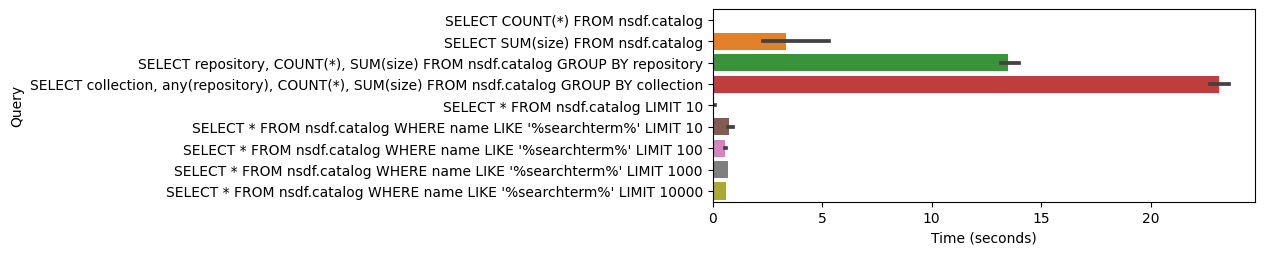

In [21]:
rcParams['figure.figsize'] = (7, 2.5)
#sns.set_palette("colorblind")


ax = sns.barplot(data=df_queries, y="query", x="elapsed_seconds")

ax.set(xlabel='Time (seconds)', ylabel='Query')

ax.set_yticklabels([
    'SELECT COUNT(*) FROM nsdf.catalog',
    'SELECT SUM(size) FROM nsdf.catalog',
    'SELECT repository, COUNT(*), SUM(size) FROM nsdf.catalog GROUP BY repository',
    'SELECT collection, any(repository), COUNT(*), SUM(size) FROM nsdf.catalog GROUP BY collection',
    'SELECT * FROM nsdf.catalog LIMIT 10',
    "SELECT * FROM nsdf.catalog WHERE name LIKE '%searchterm%' LIMIT 10",
    "SELECT * FROM nsdf.catalog WHERE name LIKE '%searchterm%' LIMIT 100",
    "SELECT * FROM nsdf.catalog WHERE name LIKE '%searchterm%' LIMIT 1000",
    "SELECT * FROM nsdf.catalog WHERE name LIKE '%searchterm%' LIMIT 10000"
])